In [15]:
G = graphs.Grid2dGraph(3, 4)
#N = [] #vozlišča; seznam sosedov?? mislim, da bi bilo to najboljše
B = [(1, 1), (2, 2)] #vozlišča, ki na začetku zgorijo
gasilci = 2 #število gasilcev
cas = 10 #max čas
#V = len(G) #število vozlišč
casi = range(1, cas+1)

p = MixedIntegerLinearProgram(maximization=False) #CLP
d = p.new_variable(binary=True) #spremenljivka, defended
b = p.new_variable(binary=True) #spremenljivka, burnt

p.set_objective(sum(b[i, cas] for i in G)) #maksimiziramo število nepogorelih vozlišč na koncu 

for t in casi:
    for i in G:
        for j in G[i]: #j je številka v seznamu vozlišča i, sosed od i
            p.add_constraint(b[i,t] + d[i,t] - b[j,t-1] >= 0)
        p.add_constraint(b[i,t] + d[i,t] <= 1)
        p.add_constraint(b[i,t] - b[i,t-1] >= 0)
        p.add_constraint(d[i,t] - d[i,t-1] >= 0)
    p.add_constraint(sum((d[i,t] - d[i,t-1]) for i in G) <= gasilci)

for i in G:
    p.add_constraint(b[i,0] == (1 if i in B else 0))
    p.add_constraint(d[i,0] == 0)

p.solve()

6.0

In [16]:
p.get_values(b)

{((0, 0), 10): 0.0,
 ((0, 1), 10): 1.0,
 ((0, 2), 10): 1.0,
 ((0, 3), 10): 0.0,
 ((1, 0), 10): 1.0,
 ((1, 1), 10): 1.0,
 ((1, 2), 10): 0.0,
 ((1, 3), 10): 0.0,
 ((2, 0), 10): 0.0,
 ((2, 1), 10): 1.0,
 ((2, 2), 10): 1.0,
 ((2, 3), 10): 0.0,
 ((0, 0), 1): 0.0,
 ((0, 1), 0): 0.0,
 ((1, 0), 0): 0.0,
 ((0, 0), 0): 0.0,
 ((0, 1), 1): 1.0,
 ((0, 2), 0): 0.0,
 ((1, 1), 0): 1.0,
 ((0, 2), 1): 0.0,
 ((0, 3), 0): 0.0,
 ((1, 2), 0): 0.0,
 ((0, 3), 1): 0.0,
 ((1, 3), 0): 0.0,
 ((1, 0), 1): 1.0,
 ((2, 0), 0): 0.0,
 ((1, 1), 1): 1.0,
 ((2, 1), 0): 0.0,
 ((1, 2), 1): 0.0,
 ((2, 2), 0): 1.0,
 ((1, 3), 1): 0.0,
 ((2, 3), 0): 0.0,
 ((2, 0), 1): 0.0,
 ((2, 1), 1): 1.0,
 ((2, 2), 1): 1.0,
 ((2, 3), 1): 0.0,
 ((0, 0), 2): 0.0,
 ((0, 1), 2): 1.0,
 ((0, 2), 2): 1.0,
 ((0, 3), 2): 0.0,
 ((1, 0), 2): 1.0,
 ((1, 1), 2): 1.0,
 ((1, 2), 2): 0.0,
 ((1, 3), 2): 0.0,
 ((2, 0), 2): 0.0,
 ((2, 1), 2): 1.0,
 ((2, 2), 2): 1.0,
 ((2, 3), 2): 0.0,
 ((0, 0), 3): 0.0,
 ((0, 1), 3): 1.0,
 ((0, 2), 3): 1.0,
 ((0, 3), 3): 0.0,


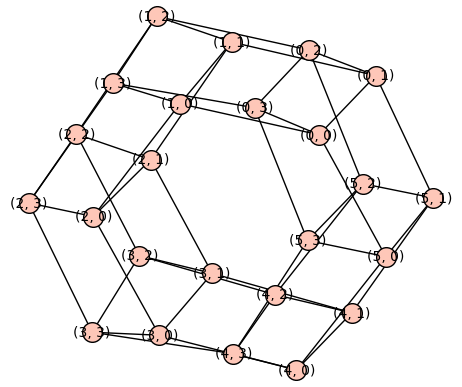

In [13]:
graphs.CycleGraph(6).cartesian_product(graphs.CycleGraph(4)).plot()

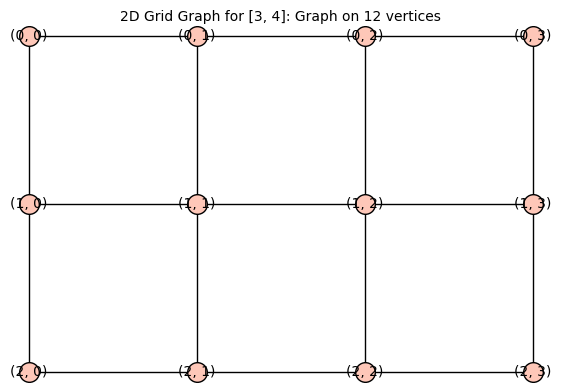

In [14]:
graphs.Grid2dGraph(3, 4)

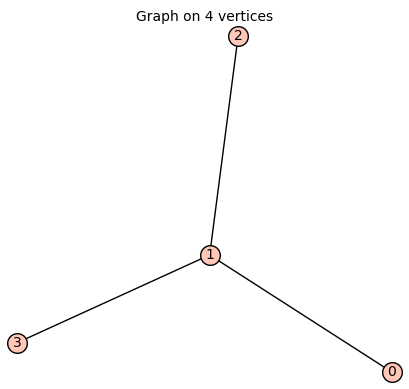

In [17]:
Graph([(0, 1), (1, 2), (1, 3)])

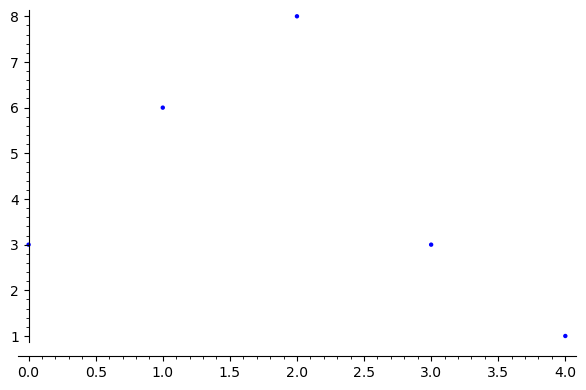

In [18]:
list_plot([3, 6, 8, 3, 1])